Average Cooperation Rates:
               scenario_name  round  avg_coop_rate
0  FullyConnected_AdaptiveQL      0           0.50
1  FullyConnected_AdaptiveQL      1           0.30
2  FullyConnected_AdaptiveQL      2           0.30
3  FullyConnected_AdaptiveQL      3           0.35
4  FullyConnected_AdaptiveQL      4           0.35


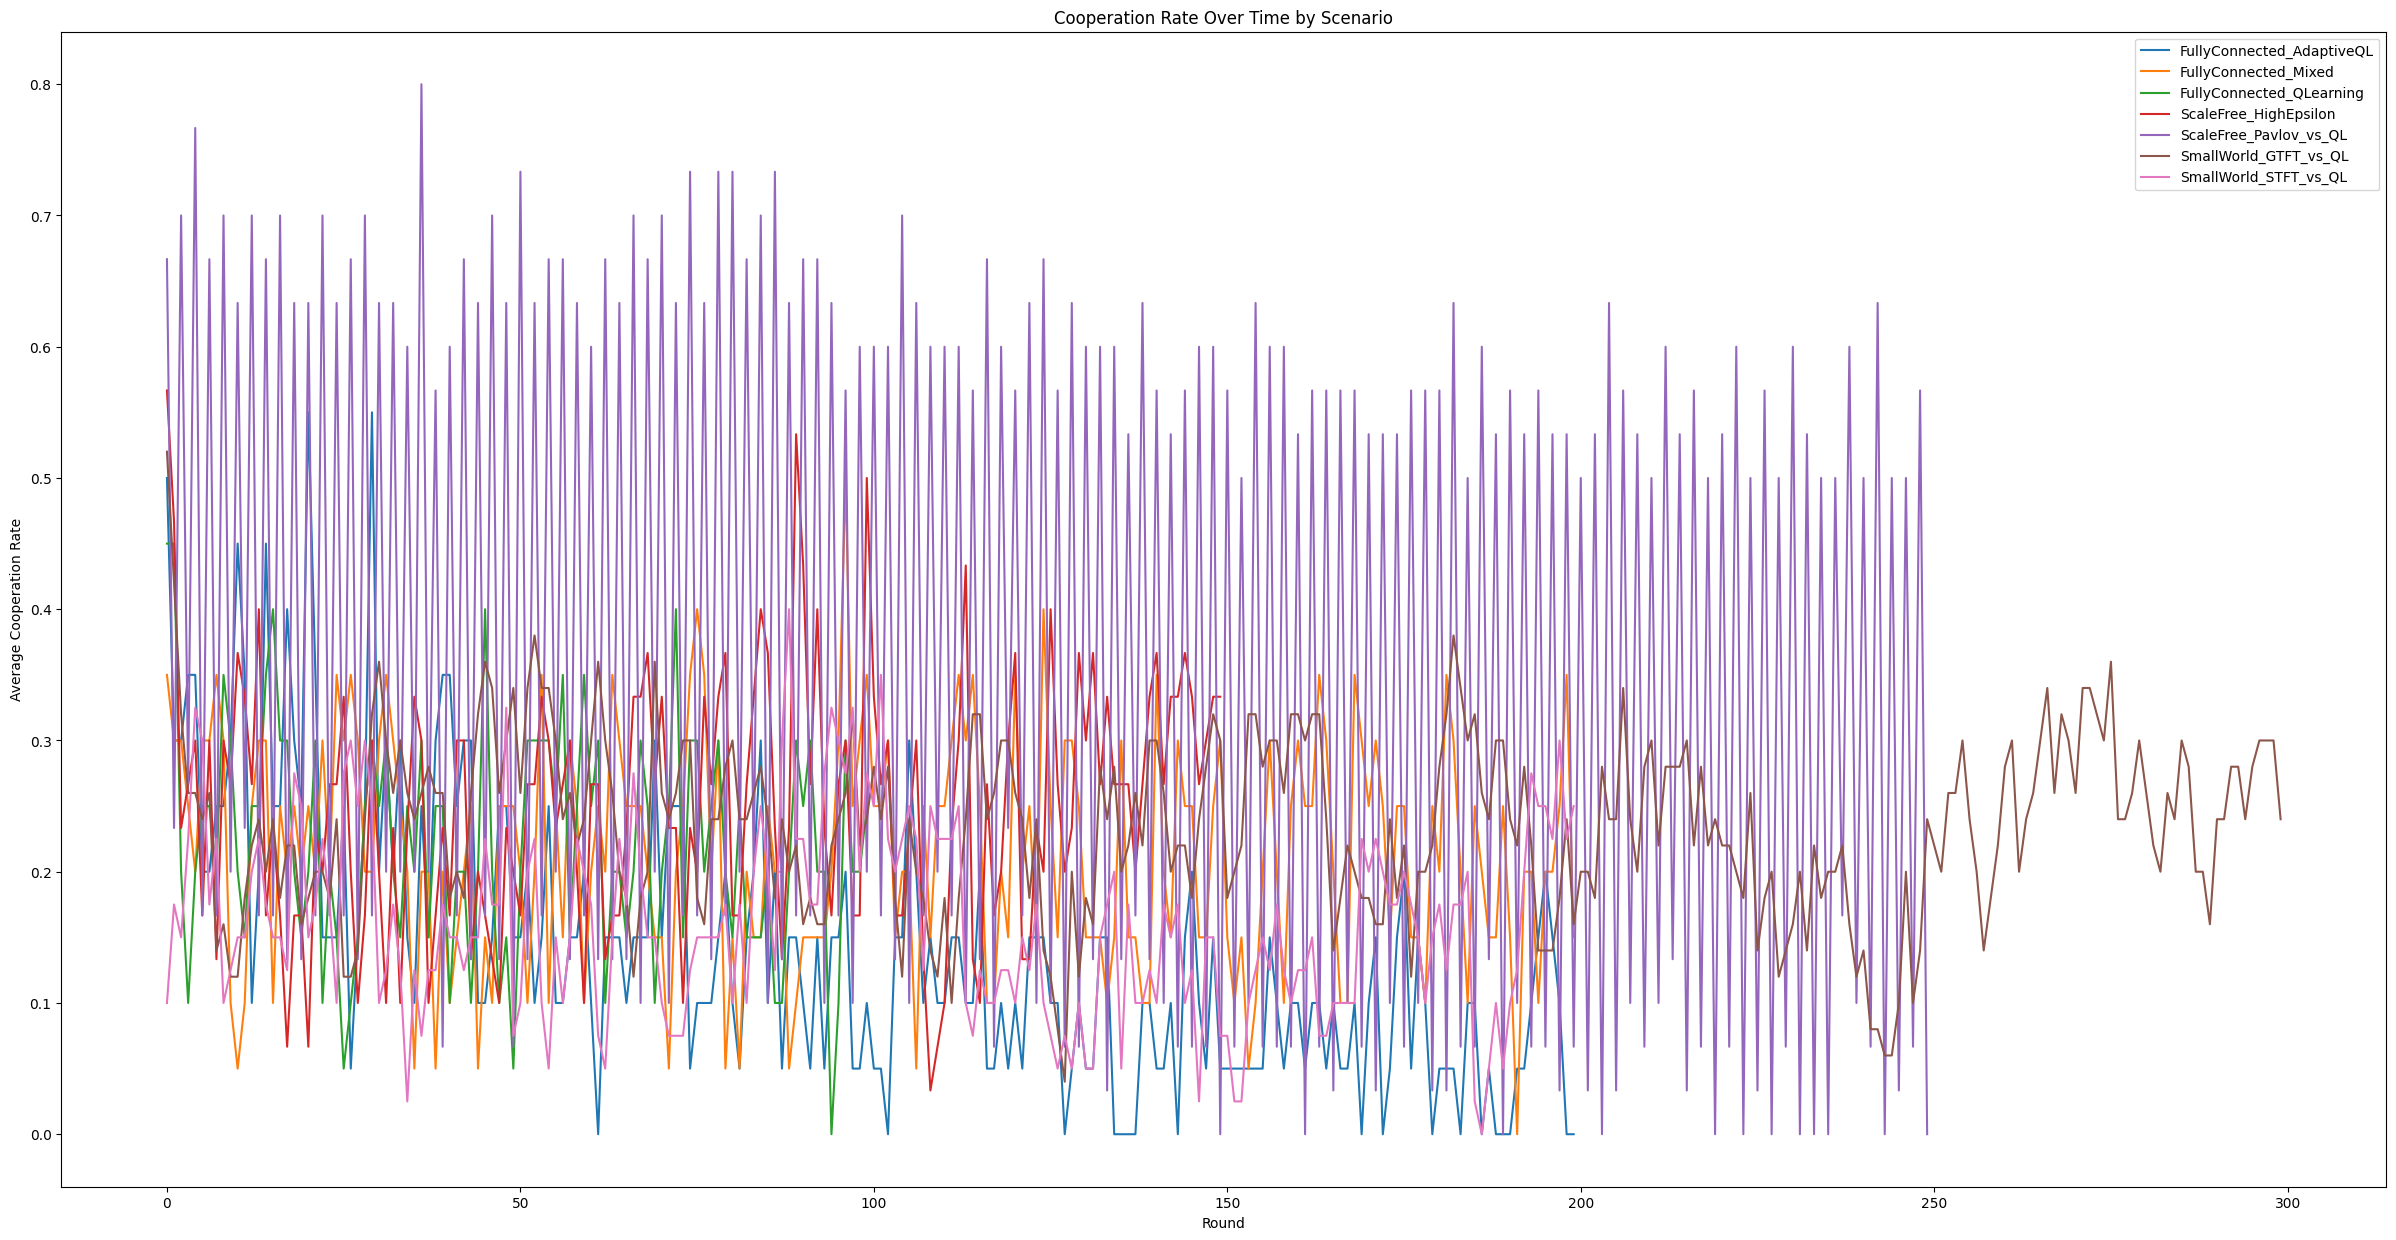

In [9]:
# analysis.ipynb cell

import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load all rounds CSV files from the results folder.
round_files = glob.glob("results/experiment_results_*_rounds.csv")
df_list = [pd.read_csv(f) for f in round_files]
df_rounds = pd.concat(df_list, ignore_index=True)

# Calculate the average cooperation rate per round for each scenario.
# The 'move' column contains strings "cooperate" and "defect".
avg_coop_rate = df_rounds.groupby(["scenario_name", "round"])["move"] \
    .apply(lambda x: (x == "cooperate").mean()) \
    .reset_index(name="avg_coop_rate")

print("Average Cooperation Rates:")
print(avg_coop_rate.head())

# Plot average cooperation rate over time for each scenario.
scenarios = avg_coop_rate["scenario_name"].unique()
plt.figure(figsize=(30, 15))
for scenario in scenarios:
    df_scenario = avg_coop_rate[avg_coop_rate["scenario_name"] == scenario]
    plt.plot(df_scenario["round"], df_scenario["avg_coop_rate"], label=scenario)

plt.xlabel("Round")
plt.ylabel("Average Cooperation Rate")
plt.title("Cooperation Rate Over Time by Scenario")
plt.legend()
plt.show()
